<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Types of Hypothesis Tests

**T-Tests**

- Purpose: Test whether the means of a sample differs from a known value or population mean

- Types:

  - One-Sample T-Test: Tests if the mean of a sample differs from a known value or population mean

  - Two-Sample T-Test(Independent T-Test): Compare the means of two independent groups

  - Paired Sample T-Test: Compares means of two related groups(EX: pre-test vs post-test)

- Example use cases

  - One-Sample:Testing if the average test score of a class differs from the national average

  - Two-Sample: Comparing test scores between two classes

  - Paired Sample: Comparing weight before and after a diet program

**Chi-square Test**

- Purpose: Test for independence or goodness-of-fit in categorical data

- Chi-Square Test of independence: tests if two categorical variables are independent

- Example use cases: Testing if gender is independent of preference for a product

- Steps:

  - Create a contingency table

  - Calculate expected frequencies

  - Compute x^2 statsistic and p-value

In [1]:
from scipy.stats import chi2_contingency

# Contingency Table
data = [[50, 30], [20, 40]]

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(data)
print("Chi-Square Statistic: \n", chi2)
print("P-Value: \n", p)
print("Expected Frequencies: \n", expected)

Chi-Square Statistic: 
 10.529166666666667
P-Value: 
 0.0011750518530845063
Expected Frequencies: 
 [[40. 40.]
 [30. 30.]]


**ANOVA(Analysis of Variance)**

- Purpose:Compare the means of three or more groups

- Hypothesis

  - Null: All group means are equal

  - Alternative: At least one group mean is differnet

- Example Use Case: Testing if the mean scores of students from three different schools differ

In [3]:
from scipy.stats import chi2_contingency, f_oneway
# Data from three groups
group1 = [12, 14, 15, 16, 17]
group2 = [11, 13, 14, 15, 16]
group3 = [10, 12, 13, 14, 15]

# Perform ANOVA
f_stat, p_value = f_oneway(group1, group2, group3)
print("F-Statistic: \n", f_stat)
print("P-Value: \n", p_value)

F-Statistic: 
 1.3513513513513515
P-Value: 
 0.29559999508292545


**Exercise 1 :- Conduct T-Tests**

In [4]:
from jax._src.core import trace_state_clean
# Conduct T-Tests
# Perform one-sample, two-sample, paired t-tests
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel

# One-Sampled T-Test
data = [12, 14, 15, 16, 17]
population_mean = 15
t_stat, p_value = ttest_1samp(data, population_mean)
print("One-sampled T-Test: \n", t_stat, p_value)

# Two-Sampled T-Test
group1 = [12, 14, 15, 16, 17]
group2 = [11, 13, 14, 15, 16]
t_stat, p_value = ttest_ind(group1, group2)
print("Two-Sample T-Test: \n", t_stat, p_value)

# Paired T-Test
pre_test = [12, 14, 15, 16, 17]
post_test = [13, 14, 16, 17, 18]
t_stat, p_value = ttest_rel(pre_test, post_test)
print("Paired T-Test: \n", t_stat, p_value)

One-sampled T-Test: 
 -0.23249527748763774 0.8275647196020324
Two-Sample T-Test: 
 0.8219949365267863 0.43489229767474047
Paired T-Test: 
 -3.9999999999999996 0.01613008990009254



**Exercise 2 :- Perform a Chi-Square Test**

In [5]:
# Perform a Chi-square Test
from scipy.stats import chi2_contingency

# Contingency Table
data = [[50, 30, 20], [30, 40, 30]]

# Perform Chi_Square Test
chi2, p, dof, expected = chi2_contingency(data)
print("Chi-Square Statistic: \n", chi2)
print("P-values: \n", p)
print("Expected Frequencies: \n", expected)

Chi-Square Statistic: 
 8.428571428571429
P-values: 
 0.01478287719483942
Expected Frequencies: 
 [[40. 35. 25.]
 [40. 35. 25.]]


**Exercise 3 :- Conduct ANOVA**

In [6]:
from scipy.stats import f_oneway

# Data fro groups
group1 = [10, 12, 14, 16, 18]
group2 = [9, 11, 13, 15, 17]
group3 = [8, 10, 12, 14, 16]

# Perform ANOVA
f_stat , p_value = f_oneway(group1, group2, group3)
print("F-Statistic: \n", f_stat)
print("P-Value: \n", p_value)

F-Statistic: 
 0.5
P-Value: 
 0.6186248513251716


**Additional Practice**
> 1. Perform a two-way ANOVA to test for interaction effects

TWO-WAY ANOVA RESULT
                       sum_sq   df         F    PR(>F)
C(FactorA)              513.5  2.0  1.273140  0.346037
C(FactorB)              675.0  1.0  3.347107  0.117068
C(FactorA):C(FactorB)  1839.5  2.0  4.560744  0.062470
Residual               1210.0  6.0       NaN       NaN


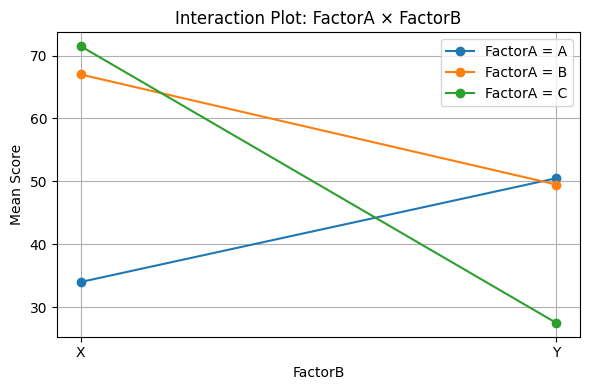

In [7]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# 1. Create Example Dataset

data = {
    'Score': [23, 45, 67, 34, 56, 78, 44, 55, 66, 77, 33, 22],
    'FactorA': ['A','A','A','A','B','B','B','B','C','C','C','C'],
    'FactorB': ['X','X','Y','Y','X','X','Y','Y','X','X','Y','Y']
}

df = pd.DataFrame(data)

# 2. Two-way ANOVA model with interaction term

model = ols('Score ~ C(FactorA) * C(FactorB)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("TWO-WAY ANOVA RESULT")
print(anova_table)

# 3. Interaction Plot

mean_table = df.groupby(['FactorA', 'FactorB'])['Score'].mean().unstack()

plt.figure(figsize=(6,4))

for level in mean_table.index:
    plt.plot(mean_table.columns, mean_table.loc[level], marker='o', label=f'FactorA = {level}')

plt.xlabel('FactorB')
plt.ylabel('Mean Score')
plt.title('Interaction Plot: FactorA × FactorB')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

> 2. Use Real-World Datasets(EX: Student scores by gender and class)for hypothesis testing

  sex race/ethnicity parental_level_of_education         lunch  \
0   F        group B           bachelor's degree      standard   
1   F        group C                some college      standard   
2   F        group B             master's degree      standard   
3   M        group A          associate's degree  free/reduced   
4   M        group C                some college      standard   

  test_preparation_course  math_percentage  reading_percentage  \
0                    none             0.72                0.72   
1               completed             0.69                0.90   
2                    none             0.90                0.95   
3                    none             0.47                0.57   
4                    none             0.76                0.78   

   writing_percentage  
0                0.74  
1                0.88  
2                0.93  
3                0.44  
4                0.75  
Index(['sex', 'race/ethnicity', 'parental_level_of_education',

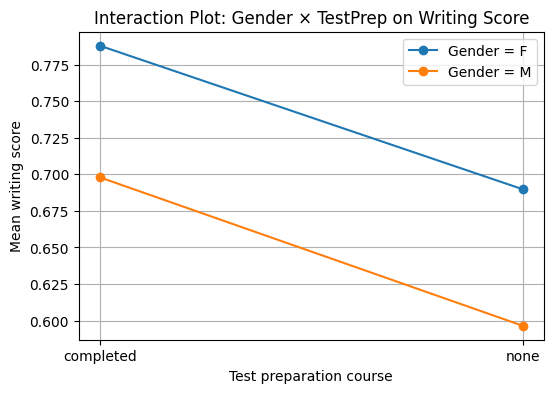

In [10]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
url = "https://raw.githubusercontent.com/haneenn5/Student-performance-in-exams-DataSet/main/Student_DataSet.csv"
df = pd.read_csv(url)

# Quick look
print(df.head())
print(df.columns)  # to see how columns are named

# Step 2: Basic summary — e.g. mean scores by gender
print("Mean math score by gender:")
print(df.groupby('sex')['math_percentage'].mean())

print("\nMean reading score by gender:")
print(df.groupby('sex')['reading_percentage'].mean())

print("\nMean writing score by gender:")
print(df.groupby('sex')['writing_percentage'].mean())

# Step 3: Example — compare math score means (two-sample t-test or ANOVA)
import scipy.stats as stats
male = df[df['sex']=='M']['math_percentage'] # Corrected: 'M' instead of 'male'
female = df[df['sex']=='F']['math_percentage'] # Corrected: 'F' instead of 'female'
t_stat, p_val = stats.ttest_ind(male, female, equal_var=False)  # Welch’s t-test
print("\nMath score: male vs female \u2192 t = %.3f, p = %.4f" % (t_stat, p_val))

# Step 4: Two-way ANOVA: e.g. effect of gender and test prep on writing score
model = ols('Q("writing_percentage") ~ C(sex) * C(Q("test_preparation_course"))', data=df).fit() # Corrected: 'test_preparation_course'
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nTwo-way ANOVA (gender \u00d7 test prep) on writing score")
print(anova_table)

# Step 5: Interaction plot (if interaction significant)
mean_table = df.groupby(['sex', 'test_preparation_course'])['writing_percentage'].mean().unstack() # Corrected: 'test_preparation_course'

plt.figure(figsize=(6,4))
for g in mean_table.index:
    plt.plot(mean_table.columns, mean_table.loc[g], marker='o', label=f'Gender = {g}')
plt.xlabel('Test preparation course')
plt.ylabel('Mean writing score')
plt.title('Interaction Plot: Gender \u00d7 TestPrep on Writing Score')
plt.legend()
plt.grid(True)
plt.show()